In [1]:
import sys
from pathlib import Path
main_dir = str(Path.cwd().parent)
if main_dir not in sys.path:
    sys.path.append(main_dir)
from tqdm import tqdm
from environment.market import MarketEnv
from environment.puppet import *
from visualization.env_status import policy_plot
import matplotlib.pyplot as plt
#logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)

# Parameters

In [2]:
K_GROUPS = 7
K_CONS_GROUPS = 6
K_ADD_GROUPS = 7

K_PUP = 3

# Market

In [3]:
cons_list = [ListConsumer(K_GROUPS, K_CONS_GROUPS),
             ImpulseConsumer(K_GROUPS, K_ADD_GROUPS, add_budget=1, impulse_coef=1.7, impulse_base=0.)
             ]
env = MarketEnv(K_GROUPS, fix_stock=10, consumer_list=cons_list, max_ep=3)
env.list_policy, env.add_policy

(array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.        ,
        0.16666667, 0.16666667]),
 array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714]))

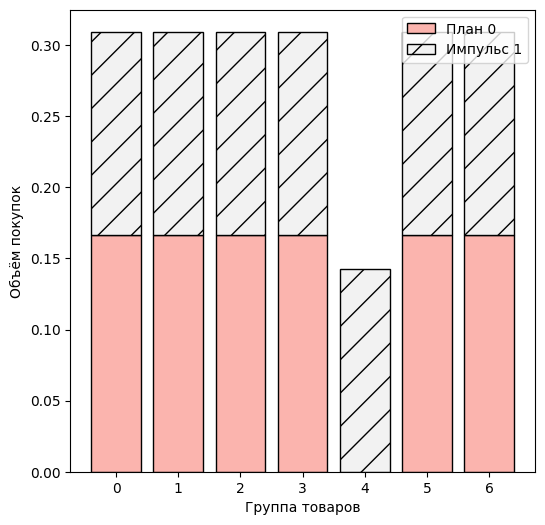

In [4]:
policy_plot(env);

In [5]:
env.reset()
env.list_policy

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.        ,
       0.16666667, 0.16666667])

In [6]:
def simulate(env):
    x = np.linspace(0, 0.5, 20)
    y = []
    yerr = []
    s = []
    serr = []
    N = 200
    env.reset()
    for discount in tqdm(x):
        action = np.full(K_GROUPS, discount)
        rewards = []
        sold = []
        for att in range(N):
            _, r0, _, info = env.step(discount=action)
            env.reset()
            rewards.append(r0)
            sold.append(info['total'])
        y.append(np.mean(rewards))
        yerr.append(np.std(rewards) / np.sqrt(N))  
        s.append(np.mean(sold))
        serr.append(np.std(sold) / np.sqrt(N))  
    return x, y, yerr, s, serr

100%|██████████| 20/20 [00:00<00:00, 29.57it/s]


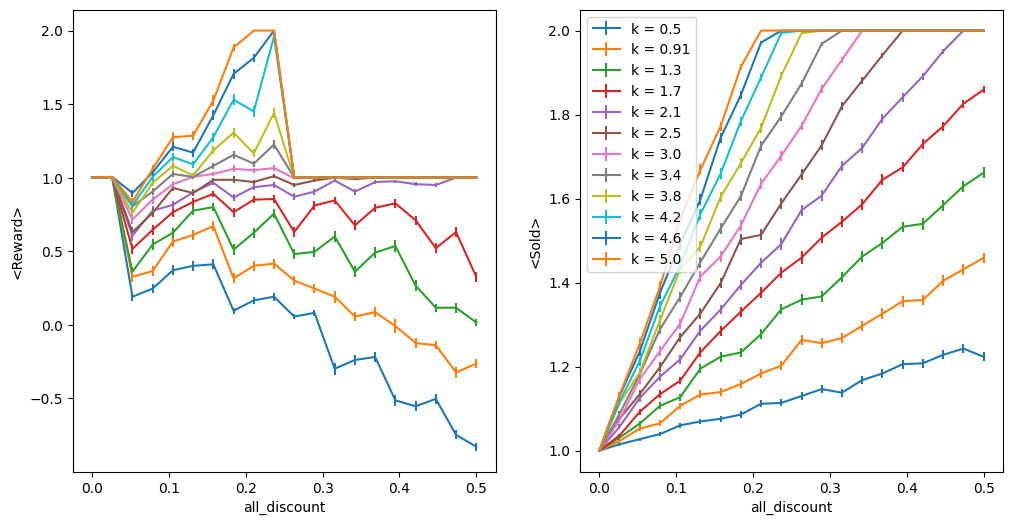

In [7]:
variants = np.linspace(0.5, 5, 12)
fig, ax = plt.subplots(1,2, figsize=(12,6))
for v in variants:
    for c in env.c_list:
        c.impulse_coef = v
    x, y, yerr, s, serr = simulate(env)
    ax[0].errorbar(x,y,yerr, label=f"k = {v}")
    ax[1].errorbar(x, s, serr, label=f"k = {v:.2}")
ax[0].set_xlabel('all_discount')
ax[1].set_xlabel('all_discount')
ax[0].set_ylabel(r'<Reward>')
ax[1].set_ylabel(r'<Sold>')
ax[1].legend()

In [8]:
env.c_list[1].impulse_coef = 5.

In [9]:
env.c_list[1].substep(prices=np.full(K_GROUPS, 0.8))[1].sum()

0.9999999999999998